In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

###### WorkFlow

###### 1. Inspect Data
###### 2. Preprocessing Data
###### 3. Exploring and Analyzing Data


#### inspecting the data


In [ ]:
startups = pd.read_excel('startup-expansion.xlsx')
startups.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
103,104,Killeen,Texas,Region 2,Old,2962,43773
131,132,West Jordan,Utah,Region 2,Old,2773,21056
50,51,Akron,Ohio,Region 1,Old,2338,50364
120,121,Sterling Heights,Michigan,Region 1,Old,2357,35022
126,127,Cedar Rapids,Iowa,Region 1,Old,2553,52072
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475
37,38,Oxnard,California,Region 2,Old,2318,64302
99,100,Billings,Montana,Region 1,Old,3015,20541
90,91,Mesquite,Texas,Region 2,Old,3072,40779
5,6,Yonkers,New York,Region 1,Old,3080,53827


In [4]:
startups.shape

(150, 7)

In [5]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [6]:
startups[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


#### Preprocessing

In [7]:
startups.duplicated().sum() 
startups = startups.drop_duplicates() 

In [8]:
startups['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [9]:
startups['State'].value_counts()

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

In [10]:
startups.isnull().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

#### Exploring & Analysing data

<Axes: xlabel='Sales Region'>

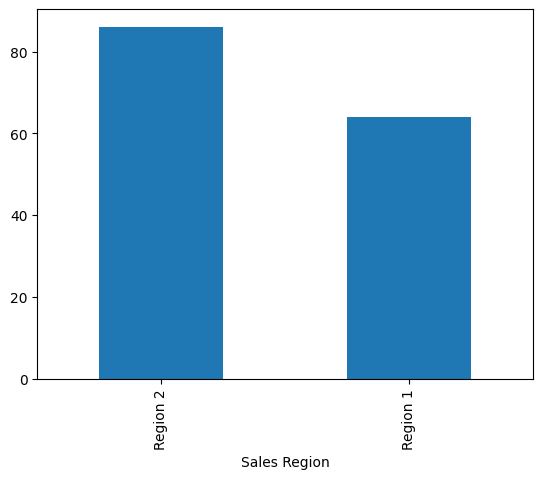

In [11]:
startups['Sales Region'].value_counts().plot.bar()

In [12]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [13]:
startups.loc[:,'Revenue']

0      48610
1      45689
2      49554
3      38284
4      59887
       ...  
145    34603
146    63148
147    43377
148    22457
149    40141
Name: Revenue, Length: 150, dtype: int64

In [15]:
startups.loc[startups['Revenue'].idxmax()]

Store ID                    64
City               Little Rock
State                 Arkansas
Sales Region          Region 2
New Expansion              Old
Marketing Spend           2440
Revenue                  68828
Name: 63, dtype: object

In [17]:
startups.sort_values(by='Revenue', ascending=False).head(5)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475
9,10,Rochester,New York,Region 1,Old,2984,64906
37,38,Oxnard,California,Region 2,Old,2318,64302
146,147,Brownsville,Texas,Region 2,New,3675,63148


In [18]:
#round((startups['Revenue'] / startups['Marketing Spend'] * 100),2)

0      1868.90
1      1675.43
2      1790.25
3      1387.60
4      2087.38
        ...   
145    1537.23
146    1718.31
147    1638.10
148     750.07
149    1651.21
Length: 150, dtype: float64

In [31]:
startups['Profit'] = (startups['Revenue'] - startups['Marketing Spend'])

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018


In [32]:
#roms -> return of marketing spend
startups['ROMS'] = round(startups['Profit'] / startups['Marketing Spend'] * 100 , 2)

In [34]:
startups['ROMS%'] = startups['ROMS'] / 100

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760


In [35]:
startups['ROMS%'] = round( startups['ROMS%'], 2)
startups.head(4)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.69
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.75
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.90
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.88


In [36]:
startups.to_csv('startups-expansion-modified.csv')